# Final Assignment Machine Learning

https://www.coursera.org/learn/machine-learning-with-python/home/welcome 

## Classification with Python

In this notebook we try to practice all the classification algorithms that we learned in this course.
We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.
Lets first load required libraries:

In [563]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset
This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

Field	Description
* Loan_status	Whether a loan is paid off on in collection
* Principal	Basic principal loan amount at the
* Terms	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
* Effective_date	When the loan got originated and took effects
* Due_date	Since it’s one-time payoff schedule, each loan has one single due date
* Age	Age of applicant
* Education	Education of applicant
* Gender	The gender of applicant

Lets download the dataset

In [564]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-05-28 16:13:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22,56K  --.-KB/s    in 0,1s    

2021-05-28 16:13:52 (171 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [565]:
# Load Data From CSV File
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [566]:
df.shape

(346, 10)

### Convert to date time object¶

In [567]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data visualization and pre-processing
Let’s see how many of each class is in our data set

In [568]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection
Lets plot some columns to underestand data better:

In [569]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

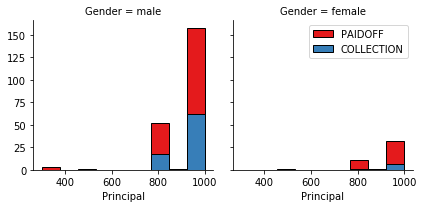

In [570]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

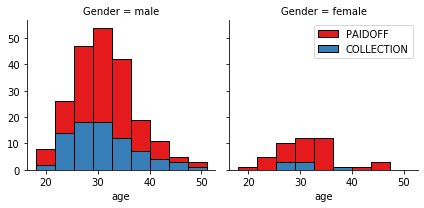

In [571]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction
### Lets look at the day of the week people get the loan

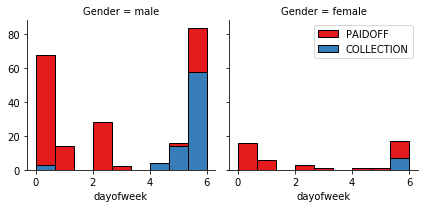

In [572]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [573]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values
Lets look at gender:

In [574]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

Lets convert male to 0 and female to 1:

In [575]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True) # Modified
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

How about education?

In [576]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

Feature befor One Hot Encoding

In [577]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [578]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
# Feature.drop(['Master or Above'], axis = 1,inplace=True) # Modification to have more accuracy
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


## Feature selection

Lets defind feature sets, X:

In [579]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?

In [580]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [581]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.08, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.08, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88, -0.08,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88, -0.08,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88, -0.08,  1.15]])

## Classification
Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression

__ Notice:__

* You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
* You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
* You should include the code of the algorithm in the following cells.

## K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.
warning: You should not use the loan_test.csv for finding the best k, however, you can split your train_loan.csv into train and test to find the best k.

In [582]:
# Train / Test split
from sklearn.model_selection import train_test_split

# Set test size to 20% after tried several ones
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [583]:
from sklearn.neighbors import KNeighborsClassifier

In [584]:
# Training
# Lets start the algorithm with k=4 for now:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [585]:
# Predicting
# we now use the model to predict the test set:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [586]:
# Accuracy evaluation
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8115942028985508
Test set Accuracy:  0.7


In [587]:
# Try several K looking for the best one
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67, 0.59, 0.73, 0.7 , 0.77, 0.71, 0.8 , 0.76, 0.74])

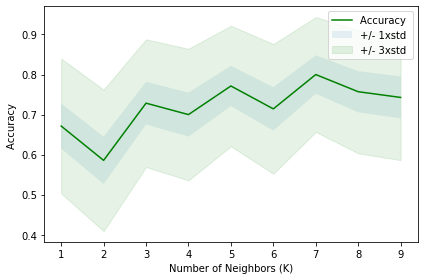

In [588]:
# K = 7 is the better one among 1 to 10
# Let's Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [589]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8 with k= 7


In [590]:
# KNN accuracy score
# Jaccard
jaccard_score(y_test, yhat, pos_label='PAIDOFF')

0.7313432835820896

In [591]:
# KNN accuracy score
# F1
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.33      0.20      0.25        15
     PAIDOFF       0.80      0.89      0.84        55

    accuracy                           0.74        70
   macro avg       0.57      0.55      0.55        70
weighted avg       0.70      0.74      0.72        70



## Decision Tree

In [592]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [593]:
# Split again to increase a little bit the test size to increase the accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=3)

In [594]:
# Modeling
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train) # Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [595]:
# Prediction
predTree = loanTree.predict(X_test)

In [596]:
print (predTree [0:5])
print (y_test [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']


In [597]:
# Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7122302158273381


In [598]:
# DecisionTree accuracy score
# Jaccard
jaccard_score(y_test, predTree, pos_label='PAIDOFF')

0.6875

In [599]:
# DecisionTree accuracy score
# F1
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

  COLLECTION       0.38      0.33      0.35        33
     PAIDOFF       0.80      0.83      0.81       106

    accuracy                           0.71       139
   macro avg       0.59      0.58      0.58       139
weighted avg       0.70      0.71      0.71       139



### Decision Tree alternative


In [638]:
# Import the decision tree model

from sklearn.tree import DecisionTreeClassifier
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfustionMx = [];
for n in range(1,md):
    
    #Train Model and Predict  
    loant = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=loant.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76, 0.76, 0.7 , 0.71, 0.71, 0.62, 0.66, 0.64, 0.66])

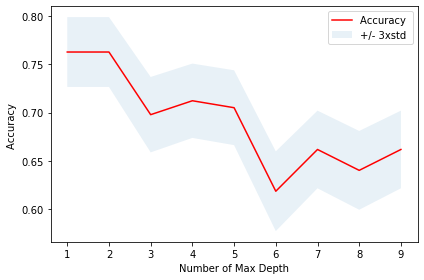

In [652]:
plt.plot(range(1,md),mean_acc,'r')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show()

In [665]:
#Building the decision tree with max depth of 6
loandt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Check the default parameters
loandt 

# Train the Decision tree model
loandt.fit(X_train,y_train)

# Predict using the model
yhat= loandt.predict(X_test)

In [666]:
#Calculating the train and test accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loandt.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
#Building the confusion matrix
print (classification_report(y_test, yhat))

# Calculate the F1 score
f1_score(y_test, yhat, average='weighted')

# Calculate the jaccard index
jaccard_score(y_test, yhat, pos_label='PAIDOFF')

Train set Accuracy:  0.7874396135265701
Test set Accuracy:  0.7122302158273381
              precision    recall  f1-score   support

  COLLECTION       0.38      0.33      0.35        33
     PAIDOFF       0.80      0.83      0.81       106

    accuracy                           0.71       139
   macro avg       0.59      0.58      0.58       139
weighted avg       0.70      0.71      0.71       139



0.6875

## Support Vector Machine

In [600]:
import pylab as pl
import scipy.optimize as opt

In [601]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


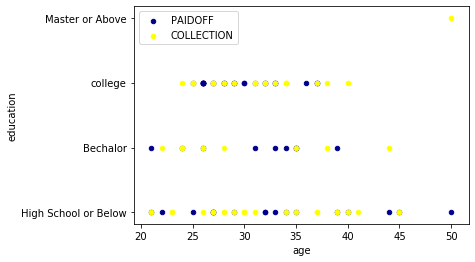

In [602]:
# Take a look at the loan_status distribution based on age and education level
ax = df[df['loan_status'] == 'PAIDOFF'][0:50].plot(kind='scatter', x='age', y='education', color='DarkBlue', label='PAIDOFF');
df[df['loan_status'] == 'COLLECTION'][0:50].plot(kind='scatter', x='age', y='education', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [603]:
# Data pre-processing and selection
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object

In [604]:
# Modeling (SVM with Scikit-learn)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [605]:
# After being fitted, the model can then be used to predict new values:
yhat = clf.predict(X_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [606]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [607]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       0.33      0.21      0.26        33
     PAIDOFF       0.78      0.87      0.82       106

    accuracy                           0.71       139
   macro avg       0.56      0.54      0.54       139
weighted avg       0.67      0.71      0.69       139

Confusion matrix, without normalization
[[92 14]
 [26  7]]


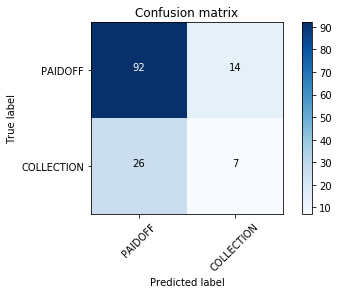

In [608]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [609]:
# Accuracy evaluation
print("SVM: ", metrics.accuracy_score(y_test, yhat))

SVM:  0.7122302158273381


In [610]:
# SVM accuracy score
# Jaccard
jaccard_score(y_test, yhat, pos_label='PAIDOFF')

0.696969696969697

In [611]:
# SVM accuracy score
# F1
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.33      0.21      0.26        33
     PAIDOFF       0.78      0.87      0.82       106

    accuracy                           0.71       139
   macro avg       0.56      0.54      0.54       139
weighted avg       0.67      0.71      0.69       139



# Logistic Regression

In [612]:
# Fit the model with our train set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [613]:
# Now we can predict using our test set:
yhat = LR.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', '

In [614]:
#predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.4 , 0.6 ],
       [0.49, 0.51],
       [0.46, 0.54],
       [0.42, 0.58],
       [0.33, 0.67],
       [0.42, 0.58],
       [0.49, 0.51],
       [0.45, 0.55],
       [0.37, 0.63],
       [0.47, 0.53],
       [0.37, 0.63],
       [0.32, 0.68],
       [0.34, 0.66],
       [0.3 , 0.7 ],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.45, 0.55],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.5 , 0.5 ],
       [0.44, 0.56],
       [0.34, 0.66],
       [0.33, 0.67],
       [0.29, 0.71],
       [0.53, 0.47],
       [0.33, 0.67],
       [0.52, 0.48],
       [0.45, 0.55],
       [0.5 , 0.5 ],
       [0.49, 0.51],
       [0.32, 0.68],
       [0.33, 0.67],
       [0.47, 0.53],
       [0.51, 0.49],
       [0.46, 0.54],
       [0.49, 0.51],
       [0.47, 0.53],
       [0.46, 0.54],
       [0.28, 0.72],
       [0.44, 0.56],
       [0.52, 0.48],
       [0.35, 0.65],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.36, 0.64],
       [0.29, 0.71],
       [0.49,

In [615]:
# Accuracy evaluation Jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label='PAIDOFF')

0.706766917293233

Confusion matrix, without normalization
[[94 12]
 [27  6]]


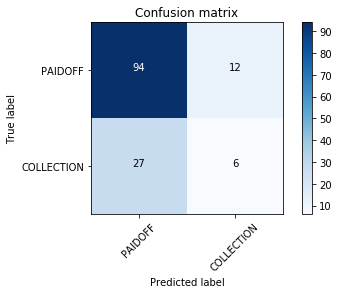

In [616]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [617]:
# F1 Score
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.33      0.18      0.24        33
     PAIDOFF       0.78      0.89      0.83       106

    accuracy                           0.72       139
   macro avg       0.56      0.53      0.53       139
weighted avg       0.67      0.72      0.69       139



In [618]:
# Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5895236283532844

In [619]:
# Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.51


## Model Evaluation using Test set

In [620]:
# from sklearn.metrics import jaccard_similarity_score # removed because it crashes
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [621]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-05-28 16:14:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3,6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3,56K  --.-KB/s    in 0s      

2021-05-28 16:14:21 (1,13 GB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation

In [622]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [623]:
# Prepare test dataframe to fit train model

test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)

test_X = test_Feature
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.2 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 ,  5.1 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.2 , -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 , -0.2 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.2 , -0.86]])

In [624]:
test_y = test_df['loan_status']

In [625]:
# KNN Prediction
yhat_KNN = neigh.predict(test_X)
yhat_KNN[0:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION'],
      dtype=object)

In [626]:
# KNN accuracy score
# Jaccard
jaccard_score(test_y, yhat_KNN, pos_label='PAIDOFF')

0.7

In [627]:
# KNN accuracy score
# F1
print (classification_report(test_y, yhat_KNN))
print("KNN F1-score: %.2f" % f1_score(test_y, yhat_KNN, average='weighted') )

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

    accuracy                           0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54

KNN F1-score: 0.70


In [628]:
# DecisionTree Prediction
yhat_predTree = loanTree.predict(test_X)
yhat_predTree[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [629]:
# DecisionTree accuracy score
# Jaccard
jaccard_score(test_y, yhat_predTree, pos_label='PAIDOFF')

0.8

In [630]:
# DecisionTree accuracy score
# F1
print (classification_report(test_y, yhat_predTree))

              precision    recall  f1-score   support

  COLLECTION       0.69      0.64      0.67        14
     PAIDOFF       0.88      0.90      0.89        40

    accuracy                           0.83        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.83      0.83      0.83        54



In [631]:
# SVM Prediction
yhat_SVM = clf.predict(test_X)
yhat_SVM [0:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [632]:
# SVM accuracy score
# Jaccard
jaccard_score(test_y, yhat_SVM, pos_label='PAIDOFF')

0.782608695652174

In [633]:
# SVM accuracy score
# F1
print (classification_report(test_y, yhat_SVM))
print("SVM F1-score: %.2f" % f1_score(test_y, yhat_SVM, average='weighted') )

              precision    recall  f1-score   support

  COLLECTION       0.67      0.57      0.62        14
     PAIDOFF       0.86      0.90      0.88        40

    accuracy                           0.81        54
   macro avg       0.76      0.74      0.75        54
weighted avg       0.81      0.81      0.81        54

SVM F1-score: 0.81


In [634]:
# LogisticRegression Prediction
yhat_LR = LR.predict(test_X)
yhat_LR_prob = LR.predict_proba(test_X)
yhat_LR[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [635]:
# LogisticRegression accuracy score
# Jaccard
jaccard_score(test_y, yhat_LR, pos_label='PAIDOFF')

0.8163265306122449

In [636]:
# LogisticRegression accuracy score
# F1
print (classification_report(test_y, yhat_LR))
print("LR F1-score: %.2f" % f1_score(test_y, yhat_LR, average='weighted') )

              precision    recall  f1-score   support

  COLLECTION       1.00      0.36      0.53        14
     PAIDOFF       0.82      1.00      0.90        40

    accuracy                           0.83        54
   macro avg       0.91      0.68      0.71        54
weighted avg       0.86      0.83      0.80        54

LR F1-score: 0.80


In [637]:
# LogisticRegression accuracy score
# Log Loss
log_loss(test_y, yhat_LR_prob)

0.5776217183299823

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0,70       | 0,70        | NA      |
| Decision Tree      | 0,80      | 0,83        | NA      |
| SVM                | 0,78       | 0,81        | NA      |
| LogisticRegression | 0,81       | 0,80        | 0,57       |


